In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.tsa.stattools import coint
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sb

now_ = datetime.datetime.now()
now = now_.strftime("%Y-%m-%d")
print(now)


end_date = now
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 80

2021-03-11


In [6]:
# THIS IS MY PORTFOLIO FOR ASSET MANAGEMENT MANAGEMENT COMPETITION 2021 WHERE 20+ BUSINESS SCHOOLS COMPETE
# MY TEAM'S NAME IS 'ORACLES OF IMPERIAL'


# These are weights and stocks of my portfolio for each week

long_weights = [[0.12, 0.05, 0.08, 0.06,
               0.06, 0.07, 0.05, 0.08,
               0.07, 0.09, 0.07, 0.05, 
                0.09, 0.06, 0.05],
               
               [0.12, 0.07, 0.07, 0.08,
               0.08, 0.05, 0.06, 0.04,
               0.07, 0.09, 0.07, 0.05, 
                0.09, 0.06, 0.07]]

short_weights = [[0.05, 0.06, 0.05, 0.05,
                0.03, 0.02, 0.04],
                
                [0.03, 0.04, 0.06, 0.06,
                0.03, 0.02, 0.04, 0.04]]

long_stocks = [['BRK-b', 'HSBA.L', 'TSLA', 
            'HUM', 'C', 'GS', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'NVO'],
               
              ['BRK-b', 'HSBA.L', 'ASML.AS', 
            'HUM', 'C', 'TOT', 'CNP.PA', 'CVX', 
               'CINE.L', 'VOE.VI', 'AT1.DE', 
              'AIV', 'AV.L', 'BOSS.DE', 'TGT']]

short_stocks = [['KMI', 'RMG.L', 'EVT.DE',
               'AFX.DE', 'CTEC.L', 'TOM.OL', 'XLNX'],
               
               ['KMI', 'RMG.L', 'UDR',
               'AFX.DE', 'CTEC.L', 'TOM.OL', 'QRVO', 'RCO.PA']]

In [7]:
import yfinance as yf
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

def weekly_performance(weeks, week, start, long_weights, short_weights, long_stocks, short_stocks):
    
    longs = pd.DataFrame([])
    shorts = pd.DataFrame([])
    if week == weeks[-1]:
        for i in long_stocks[week]:
            longs[i] = pdr.get_data_yahoo(i, start=start[week], end=end_date)['Adj Close']
        for i in short_stocks[week]:
            shorts[i] = pdr.get_data_yahoo(i, start=start[week], end=end_date)['Adj Close']
    else:
        date_end = datetime.datetime(2021, 2, 26) + relativedelta(days=8)
        date_end = date_end.strftime("%Y-%m-%d")
        
        for i in long_stocks[week]:
            longs[i] = pdr.get_data_yahoo(i, start=start[week], end=date_end)['Adj Close']
        for i in short_stocks[week]:
            shorts[i] = pdr.get_data_yahoo(i, start=start[week], end=date_end)['Adj Close']
  
    long_prices = longs[:]
    short_prices = shorts[:]
    
    for i in longs.columns:
        longs[i] = longs[i].pct_change()
    for i in shorts.columns:
        shorts[i] = shorts[i].pct_change()

    longs = longs.dropna()
    shorts = shorts.dropna()

    long_returns = pd.DataFrame([])
    for i in range(len(longs.columns)):
        long_returns[longs.columns[i]] = np.zeros(shape = (len(longs[longs.columns[i]])))
        for j in range(len(longs[long_returns.columns[i]])):
            if j == 0: 
                long_returns[longs.columns[i]][j] = 1000000*long_weights[week][i]*(1+longs[longs.columns[i]][j])
            else:
                long_returns[longs.columns[i]][j] = long_returns[longs.columns[i]][j-1]*(1+longs[longs.columns[i]][j])
            
    short_returns = pd.DataFrame([])
    for i in range(len(shorts.columns)):
        short_returns[shorts.columns[i]] = np.zeros(shape = (len(shorts[shorts.columns[i]])))
        for j in range(len(shorts[short_returns.columns[i]])):
            if j == 0: 
                short_returns[shorts.columns[i]][j] = 1000000*short_weights[week][i]*(1+shorts[shorts.columns[i]][j])
            else:
                short_returns[shorts.columns[i]][j] = short_returns[shorts.columns[i]][j-1]*(1+shorts[shorts.columns[i]][j])
    
    short_returns = -short_returns       
    portfolio = np.zeros(shape = (len(longs[longs.columns[i]])))
        
    long_sum = long_returns.sum(axis=1)
    short_sum = short_returns.sum(axis=1)
    portfolio = long_sum + short_sum
       
    performance = np.zeros(shape = (len(longs[longs.columns[i]])))
    
    portfolio_delta = 0
    for i in long_weights[week]:
        portfolio_delta += i*1000000
    for j in short_weights[week]:
        portfolio_delta += -j*1000000
    
    for j in range(len(portfolio)):
        if j == 0:
            performance[j] = (portfolio[j]-portfolio_delta)/(portfolio_delta + (1000000-portfolio_delta))
        else:
            performance[j] = (portfolio[j]-portfolio[j-1])/(portfolio[j-1] + (1000000-portfolio_delta))
            
    performers_long = pd.DataFrame([])
    performers_short = pd.DataFrame([])
    
    for i in range(len(longs.columns)):
        performers_long[longs.columns[i]] = np.zeros(shape = (1))
        performers_long[longs.columns[i]][0] = (long_prices[longs.columns[i]][len(long_prices[longs.columns[i]])-1]-long_prices[longs.columns[i]][0])/long_prices[longs.columns[i]][0]
        
    for i in range(len(shorts.columns)):
        performers_short[shorts.columns[i]] = np.zeros(shape = (1))
        performers_short[shorts.columns[i]][0] = (short_prices[shorts.columns[i]][len(short_prices[shorts.columns[i]])-1]-short_prices[shorts.columns[i]][0])/short_prices[shorts.columns[i]][0]
        

    performers_long = performers_long.sort_values(0, axis=1, ascending=False)
    performers_short = performers_short.sort_values(0, axis=1, ascending=True)
    
    print('\n\n')
    print('LONG SIDE PERFORMANCES OF WEEK {}'.format(week))
    print('--------------------------------')
    for i in performers_long.columns:
        result = (round(performers_long[i][0], 4))
        print('{}: {}%'.format(i, round(100*result, 3)))
    print('\n\n')

    print('SHORT SIDE PERFORMANCES OF WEEK {}'.format(week))
    print('--------------------------------')
    for i in performers_short.columns:
        result = (round(performers_short[i][0], 4))
        print('{}: {}%'.format(i, round(100*result, 3)))
    print('\n\n')
    return portfolio, portfolio_delta, longs, shorts, long_prices, short_prices, long_returns, short_returns, performance
    


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

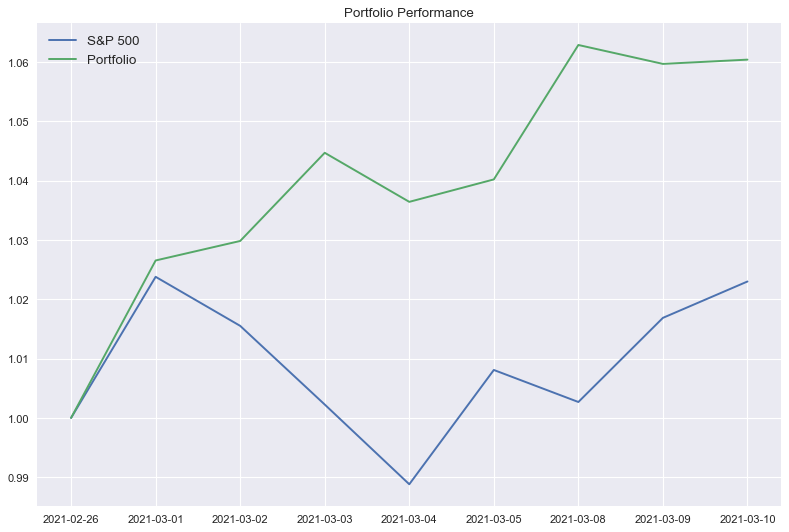

In [8]:
start = ['2021-02-26', '2021-03-05','2021-03-12','2021-03-19','2021-03-26','2021-04-02','2021-04-09','2021-04-16']
weeks = [0,1]
portfolio_performance = []
final_performance = []
index = []
returns = []
for week in weeks:
    portfolio, portfolio_delta, longs, shorts, long_prices, short_prices, long_returns, short_returns, performance = weekly_performance(weeks, week, start, long_weights, short_weights, long_stocks, short_stocks)
    if week != 0:
        index.append(long_prices.index[1:])
    else:
        index.append(long_prices.index)
    for i in range(len(performance)):
        portfolio_performance.append(performance[i])
    returns.append(performance)
    
returns_=[]
for i in range(len(returns)):
    for j in range(len(returns[i])):
        returns_.append(returns[i][j])
        

portfolio_performance = np.cumprod(1 + pd.Series(portfolio_performance))
for i in range(len(portfolio_performance)+1):
    if i == 0:
        final_performance.append(1)
    else:
        final_performance.append(portfolio_performance[i-1])
std = np.std(returns_)  
sharpe_ratio = ((final_performance[-1]/final_performance[0])**(1/len(final_performance))-1)/std
print('SHARPE RATIO: ', round(sharpe_ratio,2))
index_= []
for i in range(len(index)):
    for j in range(len(index[i])):
        index_.append(index[i][j])
        
sp500 = pdr.get_data_yahoo('^GSPC', start=start[0], end=end_date)['Adj Close']
sp500 = sp500.pct_change()
sp500 = np.cumprod(1 + pd.Series(sp500))
sp500_ = []
for i in range(len(sp500)):
    if i == 0:
        sp500_.append(1)
    else:
        sp500_.append(sp500[i])
for i in range(len(index_)):
    a = str(index_[i])[0:10]
    index_[i] = a
plt.plot(index_, sp500_, label = 'S&P 500')
plt.plot(index_, final_performance, label= 'Portfolio')
plt.title('Portfolio Performance')
plt.legend(loc="upper left", fontsize =12)

plt.show()

In [9]:
final_performance

[1,
 1.0265475661946175,
 1.0298369574813508,
 1.0447116932607723,
 1.0364358814209802,
 1.0402196004810342,
 1.0628948320078861,
 1.0597050653612494,
 1.0604230431542927]

In [10]:
longs

,BRK-b,HSBA.L,ASML.AS,HUM,C,TOT,CNP.PA,CVX,CINE.L,VOE.VI,AT1.DE,AIV,AV.L,BOSS.DE,TGT
Date,,,,,,,,,,,,,,,
2021-03-08,0.017618,0.040905,0.024274,0.004206,0.028335,-0.012805,0.043175,0.006881,0.013365,0.023512,0.028581,0.016597,0.016137,0.023041,0.024680
2021-03-09,0.005473,-0.017892,0.024610,0.004438,-0.017031,-0.006588,-0.011564,-0.002278,-0.014602,-0.007374,0.004200,0.004082,-0.002017,0.029429,0.013060
2021-03-10,0.019188,-0.002794,-0.011453,0.000397,0.038879,0.028187,0.011084,0.017078,-0.020076,-0.006857,-0.003218,0.016260,-0.004799,-0.008751,-0.003349


In [11]:
shorts

,KMI,RMG.L,UDR,AFX.DE,CTEC.L,TOM.OL,QRVO,RCO.PA
Date,,,,,,,,
2021-03-08,0.022054,0.021638,0.021152,-0.000825,-0.026735,-0.001707,-0.049703,0.005729
2021-03-09,-0.033909,0.023125,-0.012198,0.014038,-0.006867,0.054447,0.049110,0.015190
2021-03-10,0.036375,0.036333,0.009786,0.017915,0.023404,0.000811,-0.032358,0.004988
